In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [7]:
class SNN:
    def __init__(self, input_size, hidden_size, output_size, threshold=1.0, decay=0.9):
        self.weights_input_hidden = np.random.randn(input_size, hidden_size) * 0.1
        self.weights_hidden_output = np.random.randn(hidden_size, output_size) * 0.1
        self.threshold = threshold
        self.decay = decay

    def spike_function(self, membrane_potential):
        return (membrane_potential >= self.threshold).astype(float)

    def forward(self, inputs):
        membrane_hidden = np.zeros(self.weights_input_hidden.shape[1])
        hidden_spike_train = []
        for t in range(inputs.shape[0]):
            membrane_hidden = self.decay * membrane_hidden + np.dot(inputs[t], self.weights_input_hidden)
            hidden_spikes = self.spike_function(membrane_hidden)
            hidden_spike_train.append(hidden_spikes)
        membrane_output = np.dot(hidden_spikes, self.weights_hidden_output)
        output_spikes = self.spike_function(membrane_output)
        return np.array(hidden_spike_train), output_spikes

np.random.seed(42)
input_dim, hidden_dim, output_dim = 10, 5, 2

X = np.random.rand(500, input_dim)
y = np.random.randint(0, output_dim, size=(500,))
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

snn = SNN(input_size=input_dim, hidden_size=hidden_dim, output_size=output_dim)

def train_snn(model, X_train, y_train, epochs=10):
    for epoch in range(epochs):
        losses = []
        for x, target in zip(X_train, y_train):
            input_sequence = np.tile(x.reshape(1, -1), (10, 1))
            _, prediction = model.forward(input_sequence)
            target_vector = np.zeros(output_dim)
            target_vector[target] = 1
            loss = np.mean((prediction - target_vector) ** 2)
            losses.append(loss)
        print(f"Epoch {epoch + 1}, Loss: {np.mean(losses):.4f}")

train_snn(snn, X_train, y_train)

Epoch 1, Loss: 0.5000
Epoch 2, Loss: 0.5000
Epoch 3, Loss: 0.5000
Epoch 4, Loss: 0.5000
Epoch 5, Loss: 0.5000
Epoch 6, Loss: 0.5000
Epoch 7, Loss: 0.5000
Epoch 8, Loss: 0.5000
Epoch 9, Loss: 0.5000
Epoch 10, Loss: 0.5000


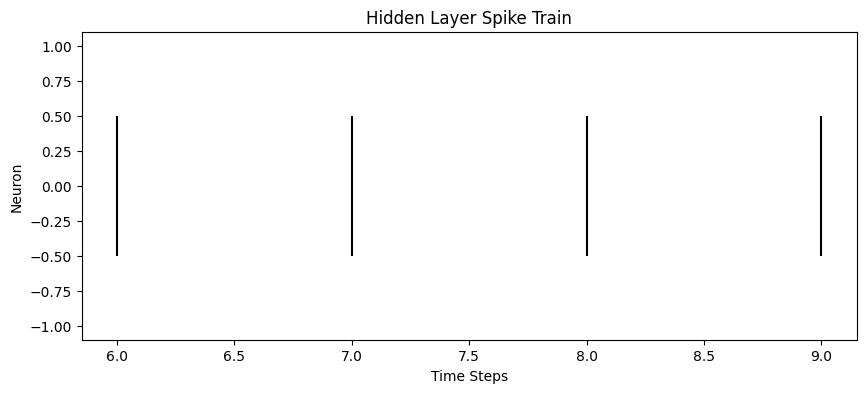

Epoch 1, Loss: 0.5000
Epoch 2, Loss: 0.5000
Epoch 3, Loss: 0.5000
Epoch 4, Loss: 0.5000
Epoch 5, Loss: 0.5000
Test Accuracy: 47.00%
Model deployed. Ready for inference.


In [8]:
def plot_spike_train(spike_train, title="Spike Train"):
    plt.figure(figsize=(10, 4))
    for neuron_idx, neuron_spikes in enumerate(spike_train.T):
        spike_times = np.where(neuron_spikes == 1)[0]
        plt.eventplot(spike_times, lineoffsets=neuron_idx, colors='black')
    plt.title(title)
    plt.xlabel('Time Steps')
    plt.ylabel('Neuron')
    plt.show()

example_input = np.tile(X_train[0].reshape(1, -1), (10, 1))
hidden_spike_train, spike_output = snn.forward(example_input)
plot_spike_train(hidden_spike_train, title="Hidden Layer Spike Train")

snn.threshold = 0.8
snn.decay = 0.95
train_snn(snn, X_train, y_train, epochs=5)

def evaluate(model, X_test, y_test):
    correct = 0
    for x, target in zip(X_test, y_test):
        input_sequence = np.tile(x.reshape(1, -1), (10, 1))
        _, prediction = model.forward(input_sequence)
        predicted_label = np.argmax(prediction)
        correct += int(predicted_label == target)
    accuracy = correct / len(y_test)
    print(f"Test Accuracy: {accuracy * 100:.2f}%")

evaluate(snn, X_test, y_test)

def deploy_model(model):
    print("Model deployed. Ready for inference.")

deploy_model(snn)